In [215]:
import paddle

In [216]:
import numpy as np
import os
from PIL import Image
size = (960,960)
# image = Image.open('/home/luffy/final_menu/test_img/menu29 .jpg')
# print(image.size)

from PIL import Image, ExifTags
 
img_file = '/home/luffy/final_menu/世界豆漿大王.jpg'
image = Image.open(img_file)
 
 
'''for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break
exif = dict(image._getexif().items())
 
if exif[orientation] == 3:
    image = image.rotate(180, expand=True)
elif exif[orientation] == 6:
    image = image.rotate(270, expand=True)
elif exif[orientation] == 8:
    image = image.rotate(90, expand=True)'''
image = image.resize(size)
image.save('resize.jpg')
print(image.size)

(960, 960)


In [217]:

'''width, height = image.size
#放大尺寸
scale_factor = 1.2

new_width = int(width * scale_factor)
new_height = int(height * scale_factor)

# 進行放大
resized_image = image.resize((new_width, new_height), Image.LANCZOS)

# 保存圖片
output_path = 'resize.jpg'  # 路徑
resized_image.save(output_path)

print(f"放大的圖片已經保存到 {output_path}")'''

'width, height = image.size\n#放大尺寸\nscale_factor = 1.2\n\nnew_width = int(width * scale_factor)\nnew_height = int(height * scale_factor)\n\n# 進行放大\nresized_image = image.resize((new_width, new_height), Image.LANCZOS)\n\n# 保存圖片\noutput_path = \'resize.jpg\'  # 路徑\nresized_image.save(output_path)\n\nprint(f"放大的圖片已經保存到 {output_path}")'

In [223]:
from paddleocr import PaddleOCR, draw_ocr

# Paddleocr目前支持的多语言语种可以通过修改lang参数进行切换
# 例如`ch`, `en`, `fr`, `german`, `korean`, `japan`
model_1 = '/home/luffy/PaddleOCR/pretrain_models/iter_30/iter_epoch_30.pdparams'
model_2 = '/home/luffy/final_menu/iter_epoch_87.pdparams'
model_3 = '/home/luffy/final_menu/v4_best_rec'
model_4  = '/home/luffy/final_menu/menu_1000_best_accuracy'
ocr = PaddleOCR(use_angle_cls=True)  # need to run only once to download and load model into memory
img_path = '/home/luffy/final_menu/resize.jpg'
result = ocr.ocr(img_path, cls=True,rec_model_dir='/home/luffy/PaddleOCR/inference_sim_model'_)
#for idx in range(len(result)):
#    res = result[idx]
 #   for line in res:
#        print(line)

from PIL import Image
result = result[0]
print(result)
image = Image.open(img_path)
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/home/luffy/final_menu/ppocr_img/fonts/chinese_cht.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')
result


[2024/06/19 17:22:39] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/luffy/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/luffy/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_

[[[[21.0, 61.0], [184.0, 61.0], [184.0, 81.0], [21.0, 81.0]],
  ('内用座位桌號：', 0.9801039099693298)],
 [[[398.0, 64.0], [597.0, 64.0], [597.0, 81.0], [398.0, 81.0]],
  ('SHIJIE SOYMILK KING', 0.877236545085907)],
 [[[671.0, 61.0], [867.0, 61.0], [867.0, 81.0], [671.0, 81.0]],
  ('振動取餐號碼牌：', 0.980000913143158)],
 [[[100.0, 99.0], [315.0, 100.0], [315.0, 121.0], [100.0, 120.0]],
  ('點餐後請先付款', 0.9716068506240845)],
 [[[347.0, 100.0], [438.0, 100.0], [438.0, 121.0], [347.0, 121.0]],
  ('謝谢您', 0.7684327960014343)],
 [[[549.0, 99.0], [887.0, 99.0], [887.0, 122.0], [549.0, 122.0]],
  ('★号標記為熱门推万品项', 0.7838598489761353)],
 [[[33.0, 139.0], [79.0, 139.0], [79.0, 158.0], [33.0, 158.0]],
  ('编號', 0.9768465757369995)],
 [[[98.0, 139.0], [118.0, 139.0], [118.0, 158.0], [98.0, 158.0]],
  ('品', 0.9999657869338989)],
 [[[280.0, 138.0], [331.0, 138.0], [331.0, 160.0], [280.0, 160.0]],
  ('名售', 0.999778151512146)],
 [[[341.0, 136.0], [479.0, 134.0], [479.0, 158.0], [341.0, 160.0]],
  ('价内用外带', 0.79712164402

In [ ]:
import numpy as np
class BOX:
    def __init__(self,box):
        self.x = np.mean([cor[0] for cor in box] )
        self.y = np.mean([cor[1] for cor in box] )
        self.x_min = 0.5*(box[0][0]+box[3][0])
        self.x_max = 0.5*(box[1][0]+box[2][0])
        self.y_min = 0.5*(box[0][1]+box[1][1])
        self.y_max = 0.5*(box[2][1]+box[3][1])

In [ ]:
def create_dict(data):
    dict = {'餐點':data[0],'價格':data[1]}
    return dict

In [ ]:
class select:
    def __init__(self,x,y,num):
        self.x = x
        self.y = y
        self.num = num

In [ ]:
import ultralytics


0: 640x640 (no detections), 2.1ms
Speed: 1.2ms preprocess, 2.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


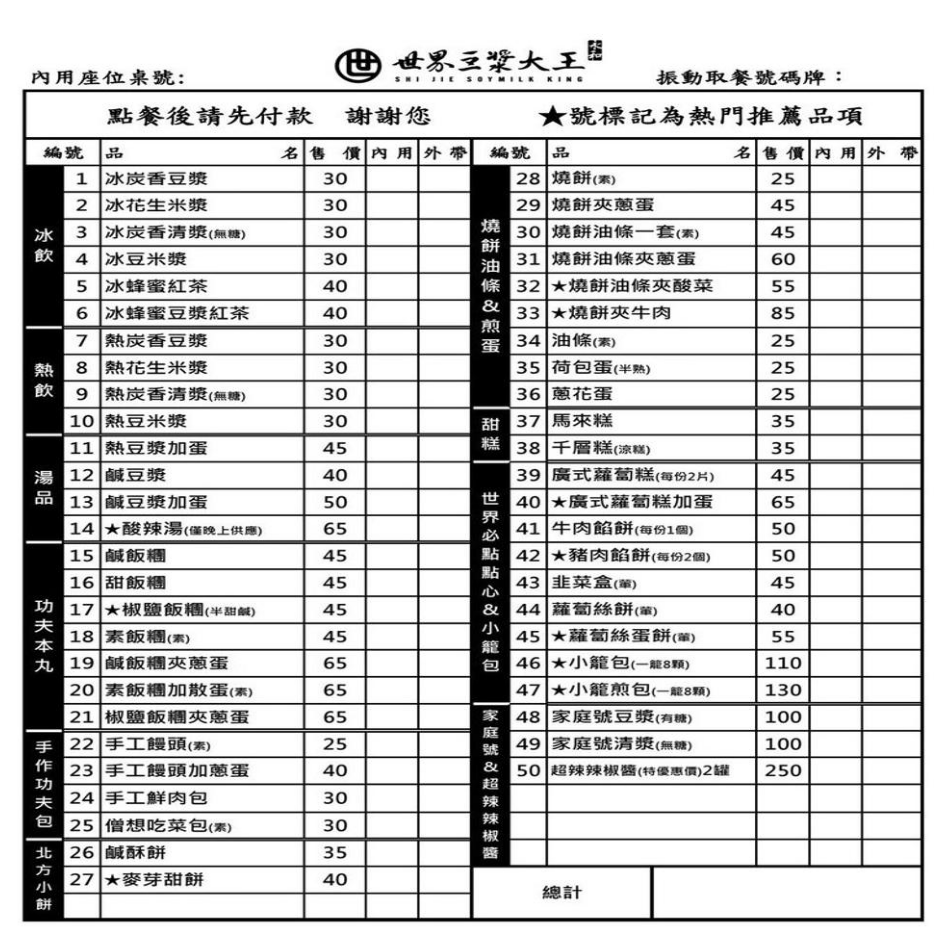

[]


In [ ]:
from det_num import det_num_of_menu
num_list, box_two_point_list = det_num_of_menu(image_path=img_path)
print(num_list)
sel_list = []           
for i,box_two_point in enumerate(box_two_point_list):
    sel_pos = (0.5*(box_two_point[0]+box_two_point[2]),0.5*(box_two_point[1]+box_two_point[3]))
    if num_list[i]==0:
        sel_num = 1
    elif num_list[i]==1:
        sel_num = 3
    elif num_list[i]==2:
        sel_num = 2
    elif num_list[i]==3:
        sel_num = 4
    else:
        sel_num = 5
    sel = select(sel_pos[0],sel_pos[1],sel_num)
    #保存所有selection
    sel_list.append(sel)
        
    
    


In [ ]:
!pip list

DEPRECATION: Loading egg at /home/luffy/anaconda3/envs/paddleOCR/lib/python3.11/site-packages/huggingface_hub-0.23.4-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Package                Version
---------------------- --------------------
anyio                  4.4.0
astor                  0.8.1
asttokens              2.0.5
attrdict               2.0.1
Babel                  2.15.0
bce-python-sdk         0.9.14
beautifulsoup4         4.12.3
blinker                1.8.2
Brotli                 1.0.9
cachetools             5.3.3
certifi                2023.7.22
chardet                4.0.0
charset-normalizer     2.0.4
click                  8.1.7
coloredlogs            15.0.1
comm                   0.2.1
contourpy              1.2.1
cssselect              1.2.0
cssutils               2.11.1
cycler                 0.10.0
Cython          

In [ ]:
all_inf = []
price_box_list = []
old_box = BOX([[0,0],[0,0],[0,0],[0,0]])
meal = ''
for inf in result:
    box = inf[0]
    new_box = BOX(box)
    if meal and new_box.y > old_box.y_max:
        #print(meal)
        meal = ''
    info = inf[1][0]
    length = len(info)
    #print(info)
    number = ''
    for i,c in enumerate(info):
        if c.isdigit():
            number += c
            #print(number)
            if i==length-1:
                d = create_dict([meal,number])
                price_box_list.append(new_box)
                all_inf.append(d)
                #print(meal,number)
                meal = ''
        else:
            if number:
                #print(meal,number)
                if len(number)>=4 or number[0]=='0':
                    number = ''
                    meal = ''
                    continue
                price = number
                d = create_dict([meal,number])
                price_box_list.append(old_box)
                all_inf.append(d)
                #print(price)
                meal = ''
                number = ''
            meal += c
    old_box = new_box
all_inf


[{'餐點': '', '價格': '1'},
 {'餐點': '冰炭香豆', '價格': '30'},
 {'餐點': '', '價格': '28'},
 {'餐點': '烧饼（素）', '價格': '25'},
 {'餐點': '', '價格': '2'},
 {'餐點': '冰花生米', '價格': '30'},
 {'餐點': '', '價格': '29'},
 {'餐點': '烧餠夹蕙蛋', '價格': '45'},
 {'餐點': '冰', '價格': '3'},
 {'餐點': '冰炭香清（無糖）', '價格': '30'},
 {'餐點': '烧', '價格': '30'},
 {'餐點': '烧餅油條一套（素）', '價格': '45'},
 {'餐點': '饼飮', '價格': '4'},
 {'餐點': '冰豆米', '價格': '30'},
 {'餐點': '油', '價格': '31'},
 {'餐點': '烧餠油條爽葱蛋', '價格': '60'},
 {'餐點': '', '價格': '5'},
 {'餐點': '冰蜂蜜红茶', '價格': '40'},
 {'餐點': '條', '價格': '32'},
 {'餐點': '★烧餅油條夹酸菜', '價格': '55'},
 {'餐點': '', '價格': '6'},
 {'餐點': '冰蜂蜜豆红茶', '價格': '40'},
 {'餐點': '&', '價格': '33'},
 {'餐點': '★烧饼夹牛肉', '價格': '85'},
 {'餐點': '', '價格': '7'},
 {'餐點': '熱炭香豆浆', '價格': '30'},
 {'餐點': '蛋', '價格': '34'},
 {'餐點': '油條（素）', '價格': '25'},
 {'餐點': '熱', '價格': '8'},
 {'餐點': '熱花生米', '價格': '30'},
 {'餐點': '', '價格': '35'},
 {'餐點': '荷包蛋（半热）', '價格': '25'},
 {'餐點': '飮', '價格': '9'},
 {'餐點': '熱炭香清浆（無糖）', '價格': '30'},
 {'餐點': '', '價格': '36'},
 {'餐點': '葱花蛋', '價格': '25

In [ ]:
price_box_list[0].y_max

187.0

In [ ]:
for sel in sel_list:
    print(sel.x,sel.y,sel.num)

In [ ]:
for price_box in price_box_list:
    print(price_box.x,price_box.y)

73.5 176.5
338.0 176.5
537.0 175.5
804.0 176.5
74.0 204.0
338.0 204.5
537.5 203.0
804.0 204.5
73.5 232.5
338.0 232.5
538.0 231.0
803.5 232.5
74.5 260.5
338.0 260.5
538.0 259.0
803.5 260.5
74.0 288.0
338.0 288.5
538.5 287.5
803.5 288.5
74.0 315.5
338.5 316.5
538.5 316.0
803.5 317.0
74.5 344.5
338.5 345.5
538.0 343.0
803.5 345.5
73.5 372.5
337.5 372.5
538.0 372.5
803.5 373.0
73.5 399.5
338.0 400.5
538.25 399.5
803.5 400.5
73.5 427.0
338.0 428.5
537.5 428.0
803.5 428.5
73.0 455.0
337.0 456.5
538.5 456.0
803.5 456.5
73.5 483.5
338.0 484.5
538.0 484.0
538.0 484.0
803.5 484.5
73.0 511.5
338.5 512.5
538.5 512.0
803.5 512.5
74.0 539.0
338.5 540.5
538.0 539.0
538.0 539.0
803.5 541.0
74.0 567.0
338.0 568.5
538.0 567.0
538.0 567.0
804.0 568.5
73.5 595.0
337.5 596.5
538.0 595.5
803.5 596.5
73.5 623.5
338.0 624.5
538.5 623.5
803.5 624.5
73.5 650.5
338.5 652.5
538.5 652.0
804.0 652.5
73.5 679.0
338.5 680.5
538.5 679.5
538.5 679.5
803.5 680.0
73.5 707.0
338.0 708.0
538.5 708.0
538.5 708.0
803.5 708.0

In [ ]:
bill = 0
num_list = [0 for _ in range(len(price_box_list))]
for sel in sel_list:
    idx = -1
    dis_min = 9999
    for i, price_box in enumerate(price_box_list):
        if price_box.y_min <= sel.y <= price_box.y_max and sel.x >= price_box.x:
            x_dis = sel.x - price_box.x_max
            if x_dis < dis_min:
                dis_min = x_dis
                print('here')
                idx = i
                
    print(sel.y)
    print(sel.num,idx)
    num_list[idx] = sel.num
    #print('here')
    bill += num_list[idx] * int(all_inf[idx]['價格'])

In [ ]:
print(len(num_list))
for i,num in enumerate(num_list):
    all_inf[i]['數量'] = num
    if num!=0:
        print(all_inf[i])



106


In [ ]:
print(bill)

0


In [ ]:
all_inf

[{'餐點': '', '價格': '1', '數量': 0},
 {'餐點': '冰炭香豆', '價格': '30', '數量': 0},
 {'餐點': '', '價格': '28', '數量': 0},
 {'餐點': '烧饼（素）', '價格': '25', '數量': 0},
 {'餐點': '', '價格': '2', '數量': 0},
 {'餐點': '冰花生米', '價格': '30', '數量': 0},
 {'餐點': '', '價格': '29', '數量': 0},
 {'餐點': '烧餠夹蕙蛋', '價格': '45', '數量': 0},
 {'餐點': '冰', '價格': '3', '數量': 0},
 {'餐點': '冰炭香清（無糖）', '價格': '30', '數量': 0},
 {'餐點': '烧', '價格': '30', '數量': 0},
 {'餐點': '烧餅油條一套（素）', '價格': '45', '數量': 0},
 {'餐點': '饼飮', '價格': '4', '數量': 0},
 {'餐點': '冰豆米', '價格': '30', '數量': 0},
 {'餐點': '油', '價格': '31', '數量': 0},
 {'餐點': '烧餠油條爽葱蛋', '價格': '60', '數量': 0},
 {'餐點': '', '價格': '5', '數量': 0},
 {'餐點': '冰蜂蜜红茶', '價格': '40', '數量': 0},
 {'餐點': '條', '價格': '32', '數量': 0},
 {'餐點': '★烧餅油條夹酸菜', '價格': '55', '數量': 0},
 {'餐點': '', '價格': '6', '數量': 0},
 {'餐點': '冰蜂蜜豆红茶', '價格': '40', '數量': 0},
 {'餐點': '&', '價格': '33', '數量': 0},
 {'餐點': '★烧饼夹牛肉', '價格': '85', '數量': 0},
 {'餐點': '', '價格': '7', '數量': 0},
 {'餐點': '熱炭香豆浆', '價格': '30', '數量': 0},
 {'餐點': '蛋', '價格': '34', '數量': 0},
 {'餐點'

In [ ]:
for inf in all_inf:
    print(inf['餐點'])


冰炭香豆

烧饼（素）

冰花生米

烧餠夹蕙蛋
冰
冰炭香清（無糖）
烧
烧餅油條一套（素）
饼飮
冰豆米
油
烧餠油條爽葱蛋

冰蜂蜜红茶
條
★烧餅油條夹酸菜

冰蜂蜜豆红茶
&
★烧饼夹牛肉

熱炭香豆浆
蛋
油條（素）
熱
熱花生米

荷包蛋（半热）
飮
熱炭香清浆（無糖）

葱花蛋

熱豆米
甜
馬來糕

熱豆加蛋
糕
千唇糕（凉糕）
湯
誠豆浆

廣式糕（每份
片）
品
豆加蛋
世
★廣式罐萄糕加蛋

★酸辣湯（谨晚上供题）

牛肉馅饼（每份
個）必


點
★猪肉馅饼（每份
個）
點
甜飯

韭菜盒（）心
功
★椒飯（半甜）
&
絲饼（）
夫
小素飯（素）

本
丸
誠飯夹葱蛋
包
★小龍包（一能
颗）

素飯加散蛋（素）

★小龍煎包（一能
颗）

椒鹽飯夹葱蛋
家
家庭號豆（有糖）
手
手工饅頭（素）
號
家庭號清浆（無糖）
作
手工饅頭加葱蛋
&
超辣辣椒醬（特優惠價）
罐
夫
手工鲜肉包
包僧想吃菜包（素）
辣椒
北
酥饼
小
★姿芽甜饼
